In [1]:
import acquire
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = acquire.get_iris_data()

In [2]:
df.drop(columns='species_id', inplace=True)

In [3]:
df.drop(columns='measurement_id', inplace=True)

In [4]:
df.rename(columns={"species_name":"species"}, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df.species)

LabelEncoder()

Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_df, test_df = train_test_split(df, test_size=.30, stratify=df[['species']])

Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

In [8]:
test_df

,species,sepal_length,sepal_width,petal_length,petal_width
51,versicolor,6.4,3.2,4.5,1.5
84,versicolor,5.4,3.0,4.5,1.5
29,setosa,4.7,3.2,1.6,0.2
39,setosa,5.1,3.4,1.5,0.2
101,virginica,5.8,2.7,5.1,1.9
3,setosa,4.6,3.1,1.5,0.2
49,setosa,5.0,3.3,1.4,0.2
107,virginica,7.3,2.9,6.3,1.8
81,versicolor,5.5,2.4,3.7,1.0
8,setosa,4.4,2.9,1.4,0.2


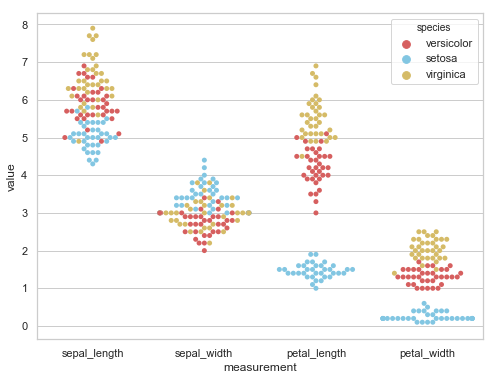

In [13]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
# df_melt = pd.melt(train_df[['sepal_length','sepal_width','petal_length', 'petal_width']], 'species', var_name="measurement")

df_melted = pd.melt(train_df, id_vars=['species'], value_vars=('sepal_length','sepal_width','petal_length','petal_width'), var_name='measurement')

plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=df_melted)

In [17]:
train_df = train_df.assign(sepal_area=train_df.sepal_length*train_df.sepal_width)

In [18]:
train_df = train_df.assign(petal_area=train_df.petal_length*train_df.petal_width)

Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width

petal_length x petal_width

sepal_area x petal_area

sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

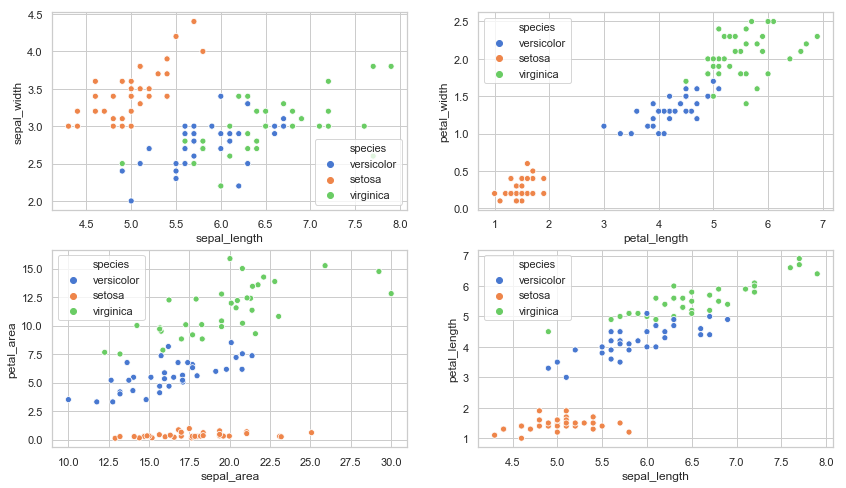

In [67]:
p1 = train_df['sepal_length']
p2 = train_df['sepal_width']
p3 = train_df['petal_length']
p4 = train_df['petal_width']
p5 = train_df['sepal_area']
p6 = train_df['petal_area']
p7 = train_df['species']

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.scatterplot(x = p1, y = p2, hue=p7)
plt.subplot(2,2,2)
sns.scatterplot(x = p3, y = p4, hue=p7)
plt.subplot(2,2,3)
sns.scatterplot(x = p5, y = p6, hue=p7)
plt.subplot(2,2,4)
sns.scatterplot(x = p1, y = p3, hue=p7)

Create a heatmap of each variable layering correlation coefficient on top.

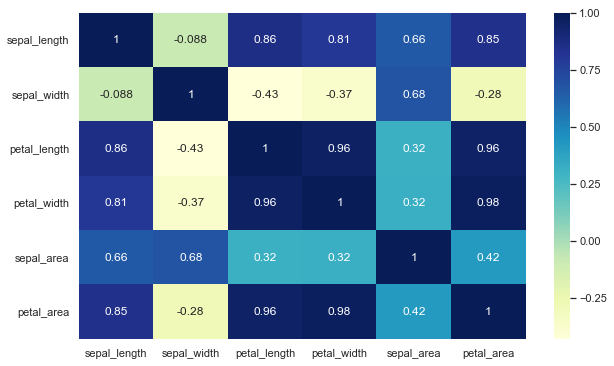

In [64]:
# train_df.fillna(value=np.nan, inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), cmap='YlGnBu', annot=True)

Create a scatter matrix visualizing the interaction of each variable


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


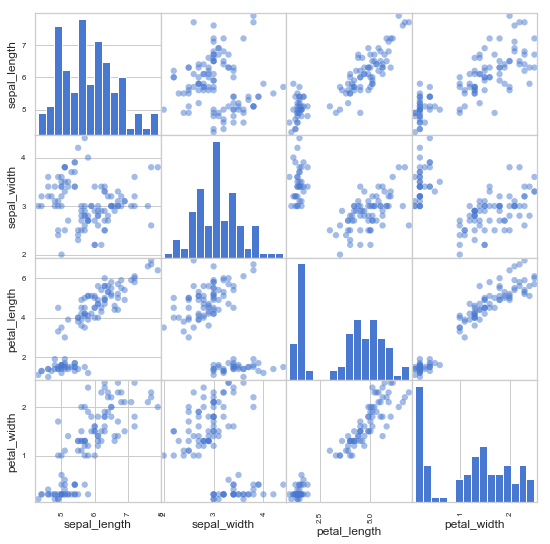

In [69]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df[['sepal_length','sepal_width','petal_length', 'petal_width']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.

must include null hypothesis, alternative hyp, t-test, results, summary

H0: the difference in sepal length between virginica and versicolor is insignificant.

Ha: the difference in sepal length between virginica and versicolor is substantial.

We will test if the sepal length of virginica is significantly different than that of the versicolor.

If there is difference, then variable sepal_length is a good choice to keep as a feature.

We can use a t-test here, as sepal_length is somwhat normally distributed.

In [70]:
from scipy.stats import pearsonr, ttest_ind

In [71]:
train1 = train_df[train_df.species == 'virginica']
train2 = train_df[train_df.species == 'versicolor']

ttest_ind(train1.sepal_length, train2.sepal_length)

Ttest_indResult(statistic=4.661492482462619, pvalue=1.5131286307711056e-05)

In [72]:
#sepal length is not significantly different for the two species